In [35]:
import pyfits as pf
import h5py
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))
palette = itertools.cycle(sns.color_palette())

Populating the interactive namespace from numpy and matplotlib


In [2]:
cosmos = pf.open("data/KiDS.x.zCOSMOS.fits")[1].data
gama = pf.open("data/KiDSxGAMAequ+G23.fits")[1].data
sdss = pf.open("data/KiDS.DR3.x.SDSS.DR13.galaxies.fits")[1].data
deep = pf.open("data/KiDS-like.x.DEEP2.DR4.fits")[1].data

In [3]:
mask = np.where(np.in1d(sdss['ID'] , gama['ID'])==False)
sdss = sdss[mask]
#getting rid of sdss galaxies that are in GAMA

All these catalogs have different formats. The goal is to combine them and make a consistent catalog of spectroscopic redshifts and KiDS photometry of galaxies. 

In [11]:
def cosmos_reduction():
    
    data = cosmos

    data = data[data['NIMAFLAGS_ISO_THELI']&01010111==0]

    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Zspec']
    RA = data['RA_THELI']
    DEC = data['DEC_THELI']

    u_g = data['MAG_GAAP_u_CALIB'] - data['MAG_GAAP_g_CALIB']
    g_r = data['MAG_GAAP_g_CALIB'] - data['MAG_GAAP_r_CALIB']
    r_i = data['MAG_GAAP_r_CALIB'] - data['MAG_GAAP_i_CALIB']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col 

In [4]:
def deep_reduction():
    
    data = deep
    data = data[data['NIMAFLAGS_ISO_THELI']&01010111==0]
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Zspec']
    RA = data['RA_THELI']
    DEC = data['DEC_THELI']

    u_g = data['MAG_GAAP_u_CALIB'] - data['MAG_GAAP_g_CALIB']
    g_r = data['MAG_GAAP_g_CALIB'] - data['MAG_GAAP_r_CALIB']
    r_i = data['MAG_GAAP_r_CALIB'] - data['MAG_GAAP_i_CALIB']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col

In [6]:
def gama_reduction():
    
    data = gama
    
    data = data[data['IMAFLAGS_ISO_U']&01010111==0]
    data = data[data['IMAFLAGS_ISO_G']&01010111==0]
    data = data[data['IMAFLAGS_ISO_R']&01010111==0]
    data = data[data['IMAFLAGS_ISO_I']&01010111==0]
    
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Z']
    RA = data['RA']
    DEC = data['DEC']

    u_g = data['COLOR_GAAPHOM_U_G']
    g_r = data['COLOR_GAAPHOM_G_R']
    r_i = data['COLOR_GAAPHOM_R_I']
    
    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col

def sdss_reduction():
    
    data = sdss
    
    data = data[data['IMAFLAGS_ISO_U']&01010111==0]
    data = data[data['IMAFLAGS_ISO_G']&01010111==0]
    data = data[data['IMAFLAGS_ISO_R']&01010111==0]
    data = data[data['IMAFLAGS_ISO_I']&01010111==0]
    
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]

    u = data['MAG_GAAP_U'] + data['ZPT_OFFSET_U'] - data['EXT_SFD_U']
    g = data['MAG_GAAP_G'] + data['ZPT_OFFSET_G'] - data['EXT_SFD_G']
    r = data['MAG_GAAP_R'] + data['ZPT_OFFSET_R'] - data['EXT_SFD_R']
    i = data['MAG_GAAP_I'] + data['ZPT_OFFSET_I'] - data['EXT_SFD_I']
    
    mask = (u<25.4)&(g<25.6)&(r<24.7)&(i<24.5) 
    
    data = data[mask]
    
    u = data['MAG_GAAP_U'] + data['ZPT_OFFSET_U'] - data['EXT_SFD_U']
    g = data['MAG_GAAP_G'] + data['ZPT_OFFSET_G'] - data['EXT_SFD_G']
    r = data['MAG_GAAP_R'] + data['ZPT_OFFSET_R'] - data['EXT_SFD_R']
    i = data['MAG_GAAP_I'] + data['ZPT_OFFSET_I'] - data['EXT_SFD_I']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Z']
    RA = data['RA']
    DEC = data['DEC']

    u_g = data['COLOR_GAAPHOM_U_G']
    g_r = data['COLOR_GAAPHOM_G_R']
    r_i = data['COLOR_GAAPHOM_R_I']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col


In [7]:
dp = gama_reduction()
dp = np.hstack([gama_reduction() , sdss_reduction()])
zdp = dp[11,:]

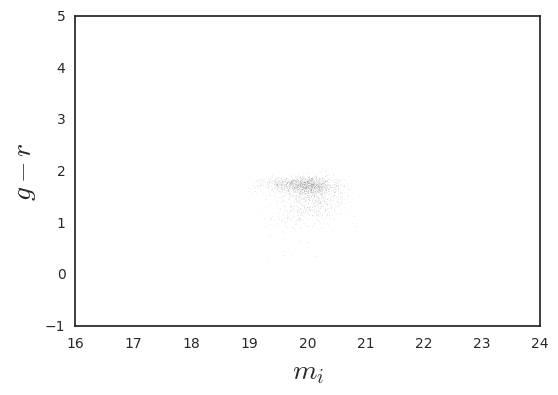

In [36]:
mask = (zdp>.52) & (zdp<.54)
dpp = dp[:,mask]
plt.scatter(dpp[3,:] , dpp[9,:] , s = 0.001)
plt.xlim([16,24])
plt.xlabel(r"$m_{i}$" , fontsize = 20)
plt.ylabel(r"$g-r$" , fontsize = 20)

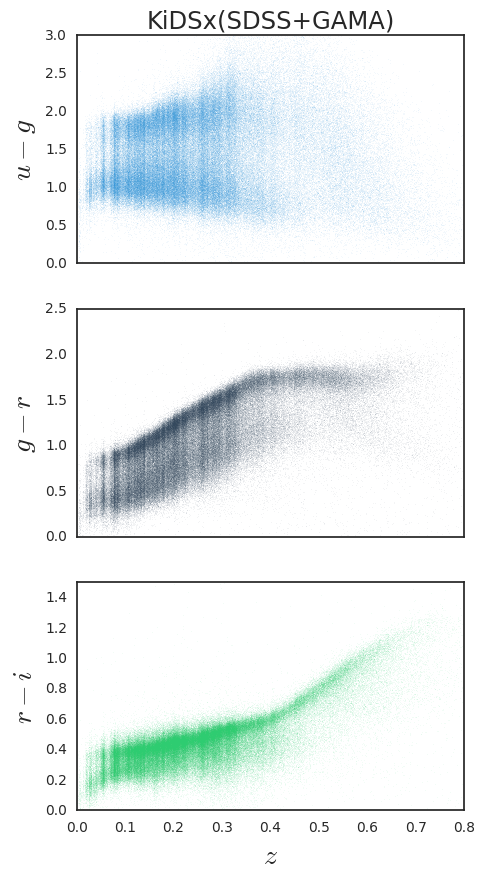

In [38]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))
ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.001 , color = next(palette))
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.001, color = next(palette))
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.001, color = next(palette))
ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA)" , fontsize = 17.5)


In [15]:
dpp = np.hstack([gama_reduction() , sdss_reduction() , cosmos_reduction()])
dc = cosmos_reduction()

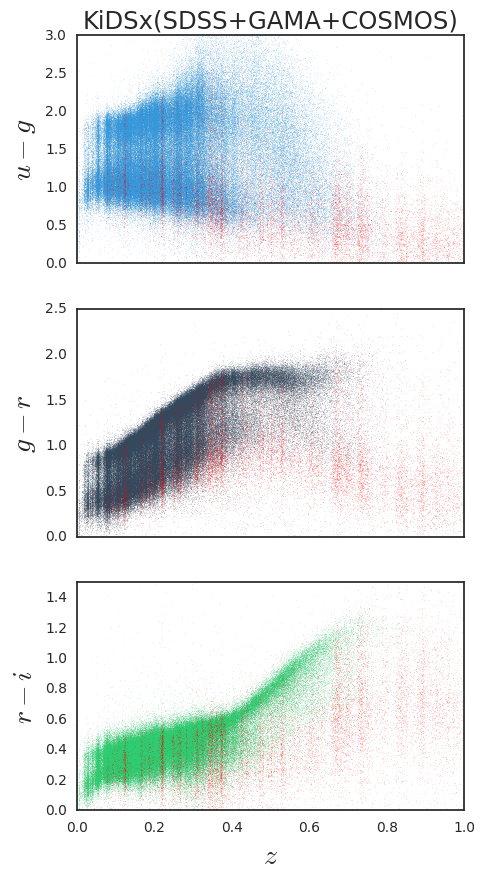

In [50]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))

ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.005 ,  color = next(palette))
ax[0].scatter(dc[11,:] , dc[8,:] , s = 0.005 , color = "r" , alpha = 1)
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.005,  color = next(palette))
ax[1].scatter(dc[11,:] , dc[9,:] , s = 0.005 , color = "r", alpha = 1)
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.005,  color = next(palette))
ax[2].scatter(dc[11,:] , dc[10,:] , s = 0.005 , color = "r", alpha = 1)

ax[0].set_xlim(0,1.0)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])
ax[1].set_xlim(0,1.0)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])
ax[2].set_xlim(0,1.0)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA+COSMOS)" , fontsize = 17.5)
